# Conversion from MAD-X tfs file

In [2]:
import georges_core.twiss
import zgoubidoo
from zgoubidoo import sequences
from zgoubidoo.commands import *
from zgoubidoo import ureg as _ureg

## Load the MAD-X Twiss table and convert to Zgoubi input file

In [4]:
input_madx = sequences.TwissSequence(filename="../ressources/test45degspreader.outx")
zi = zgoubidoo.Input.from_sequence(sequence=input_madx,
                                   beam=BeamInputDistribution,
                                   with_survey=True,
                                   with_survey_reference=True,
                                   converters={'sbend': zgoubidoo.converters.sbend_to_zgoubi,
                                               'quadrupole': zgoubidoo.converters.quadrupole_to_zgoubi},
                                   options={
                                       'sbend': {'command': Dipole}
                                   }
                                  )
zi.XPAS = 5*_ureg.cm
zr_tracking = zgoubidoo.Zgoubi()(zi).collect()
input_madx = sequences.TwissSequence(filename="../ressources/test45degspreader.outx", with_units=False)

/Users/rtesse/reps/ULB-Metronu/python_libs/zgoubidoo/zgoubidoo-src/libs/georges-core/georges_core/codes_io/mad.py:27: FutureWarning:

The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.



/Users/rtesse/miniconda3/envs/zgoubidoo/lib/python3.10/site-packages/pint/compat.py:55: UnitStrippedWarning:

The unit of the quantity is stripped when downcasting to ndarray.

/Users/rtesse/miniconda3/envs/zgoubidoo/lib/python3.10/site-packages/pint/compat.py:55: UnitStrippedWarning:

The unit of the quantity is stripped when downcasting to ndarray.

/Users/rtesse/reps/ULB-Metronu/python_libs/zgoubidoo/zgoubidoo-src/libs/georges-core/georges_core/codes_io/mad.py:27: FutureWarning:

The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.





## Perform Twiss

In [6]:
zi.replace('BEAM', Objet5('BEAM', BORO=input_madx.kinematics.brho))
zi.XPAS=15*_ureg.cm

zr_twiss = zgoubidoo.Zgoubi()(zi).collect()
M = zgoubidoo.twiss.compute_transfer_matrix(
    beamline=zi,
    tracks=zr_twiss.tracks_frenet)
results_twiss = georges_core.twiss.Twiss(twiss_init=input_madx.betablock)(matrix=M)

/Users/rtesse/miniconda3/envs/zgoubidoo/lib/python3.10/site-packages/pint/compat.py:55: UnitStrippedWarning:

The unit of the quantity is stripped when downcasting to ndarray.



## Plotting

### Global coordinates

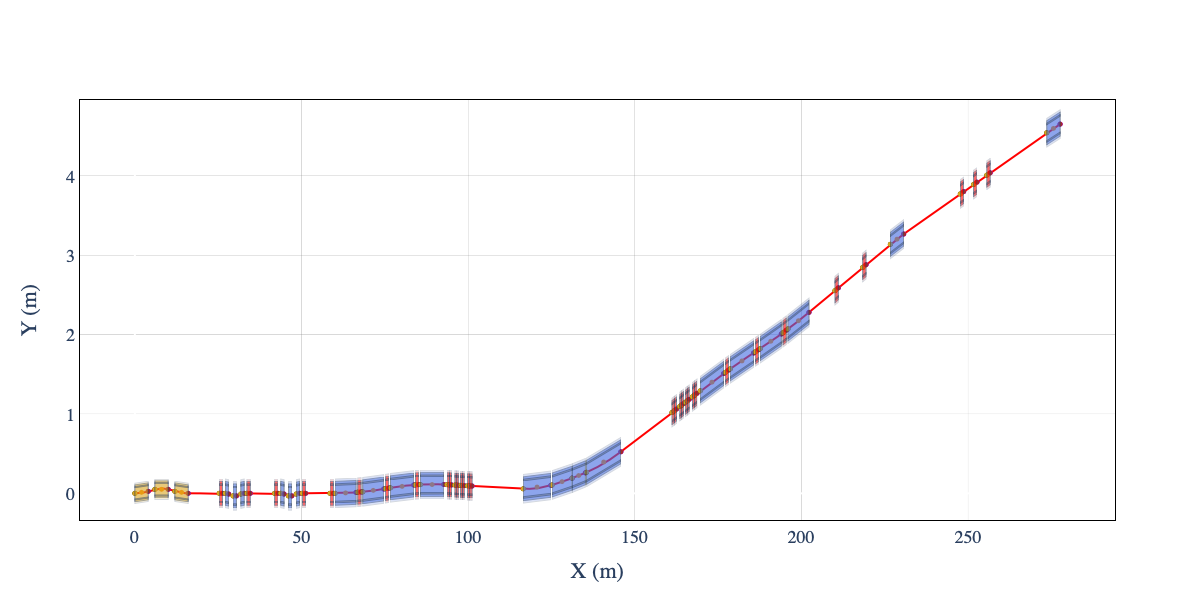

In [9]:
artist=zgoubidoo.vis.ZgoubidooPlotlyArtist(width=800)

artist.fig['layout']['xaxis']['title'] = 'X (m)'
artist.fig['layout']['yaxis']['title'] = 'Y (m)'

artist.scatter(
    x=zr_tracking.tracks_global['XG'],
    y=zr_tracking.tracks_global['YG'],
    marker={'color': 'red', 'size': 2},
    mode='lines',
    showlegend=False,
    )

artist.plot_beamline(beamline=zi, with_frames=True, with_apertures=True, with_map=True)
artist.render()

### Twiss

#### Beta function

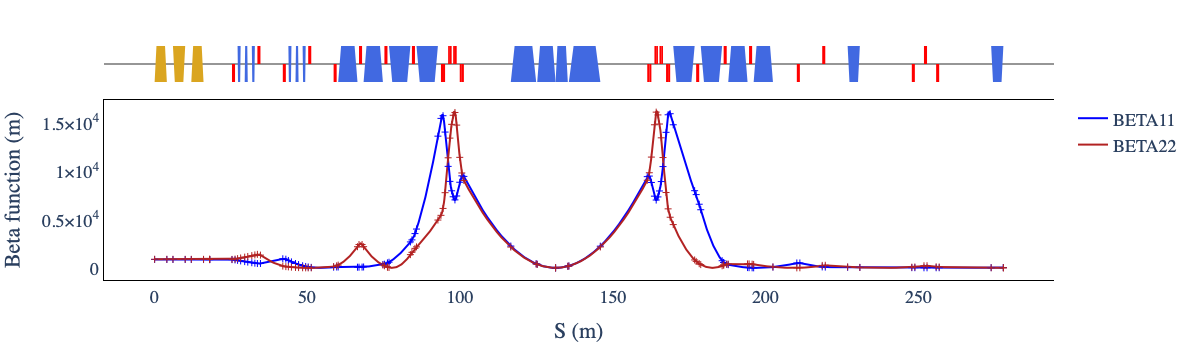

In [11]:
art = zgoubidoo.vis.ZgoubidooPlotlyArtist(width=600)
artist = art.plot_twiss(beamline=zi, twiss=results_twiss, twiss_madx=input_madx.df, beta=True, dispersion=False)
artist.render()

#### Alpha function 


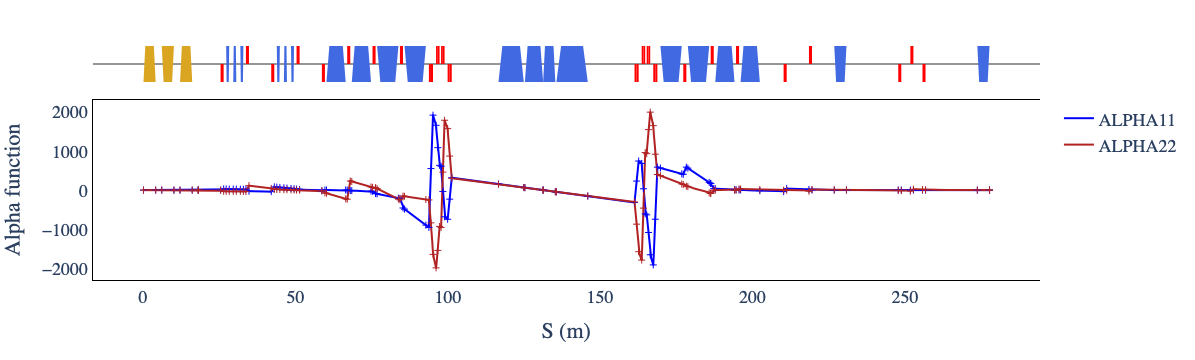

In [12]:
art = zgoubidoo.vis.ZgoubidooPlotlyArtist(width=600)
artist = art.plot_twiss(beamline=zi, twiss=results_twiss, twiss_madx=input_madx.df, beta=False, alpha=True, dispersion=False)
artist.render()

#### Dispersion

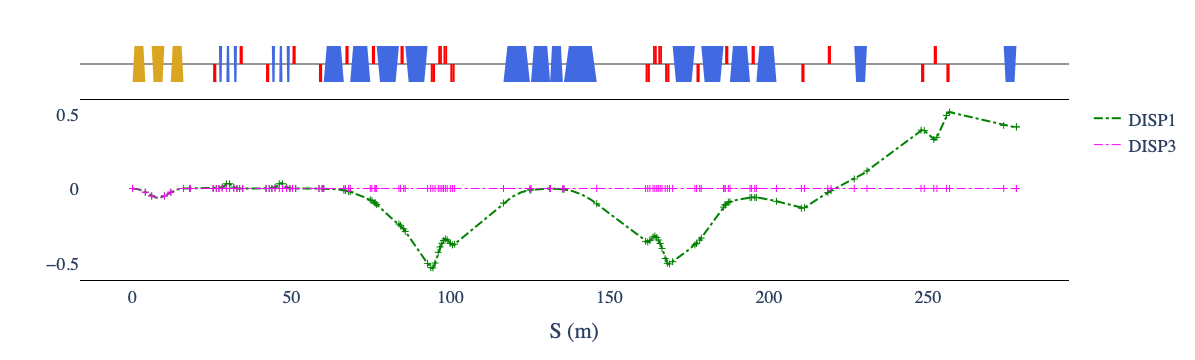

In [13]:
art = zgoubidoo.vis.ZgoubidooPlotlyArtist(width=600)
artist = art.plot_twiss(beamline=zi, twiss=results_twiss, twiss_madx=input_madx.df, beta=False, alpha=False, dispersion=True)
artist.render()

#### Dispersion prime

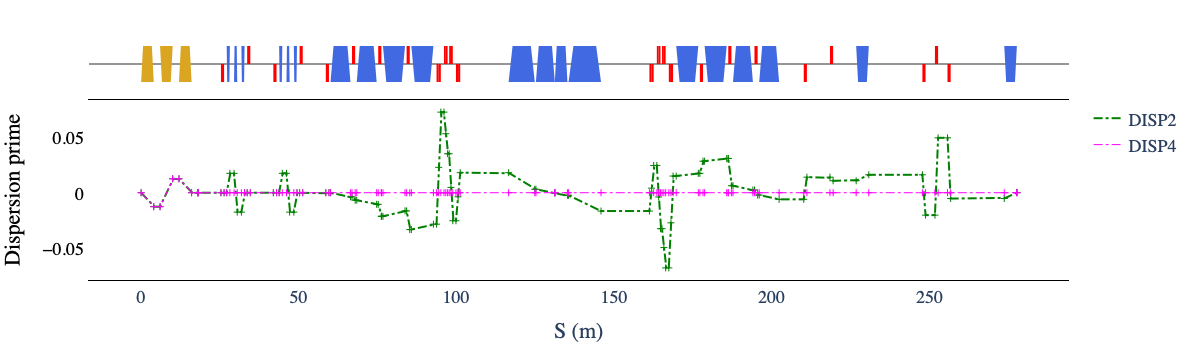

In [14]:
art = zgoubidoo.vis.ZgoubidooPlotlyArtist(width=600)
artist = art.plot_twiss(beamline=zi, twiss=results_twiss, twiss_madx=input_madx.df, beta=False, alpha=False, dispersion=False, dispersion_prime=True)
artist.render()

#### Phase advance

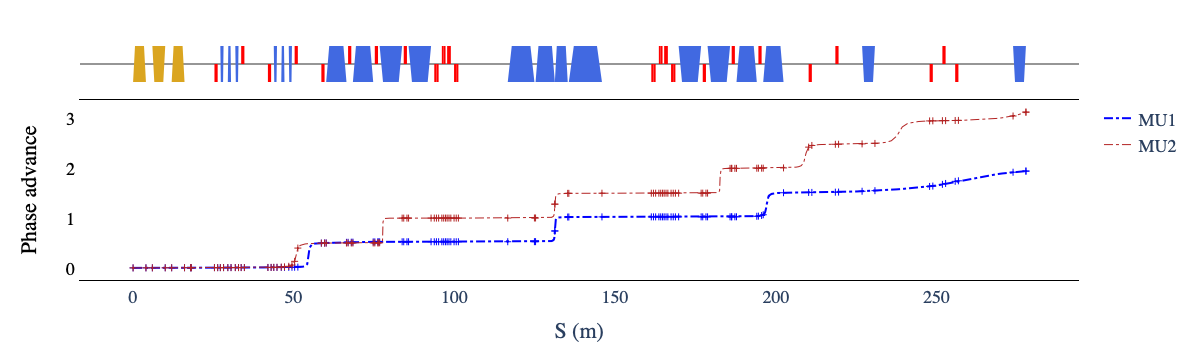

In [15]:
art = zgoubidoo.vis.ZgoubidooPlotlyArtist(width=600)
artist = art.plot_twiss(beamline=zi, twiss=results_twiss, twiss_madx=input_madx.df, beta=False, alpha=False, dispersion=False, mu=True)
artist.render()